In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/Brain-Stroke-CT-Image-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset.git

/content
Cloning into 'Brain-Stroke-CT-Image-Dataset'...
remote: Enumerating objects: 2510, done.
remote: Total 2510 (delta 0), reused 0 (delta 0), pack-reused 2510
Receiving objects: 100% (2510/2510), 59.84 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (2542/2542), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-Stroke-CT-Image-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Stroke, Số tệp: 950
-Thư mục: Normal, Số tệp: 1551
Tổng số thư mục: 2
-Thư mục: Stroke, Số tệp: 20
-Thư mục: Normal, Số tệp: 20


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset


In [7]:
# Set the path to your dataset
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/sample'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'

Class Stroke


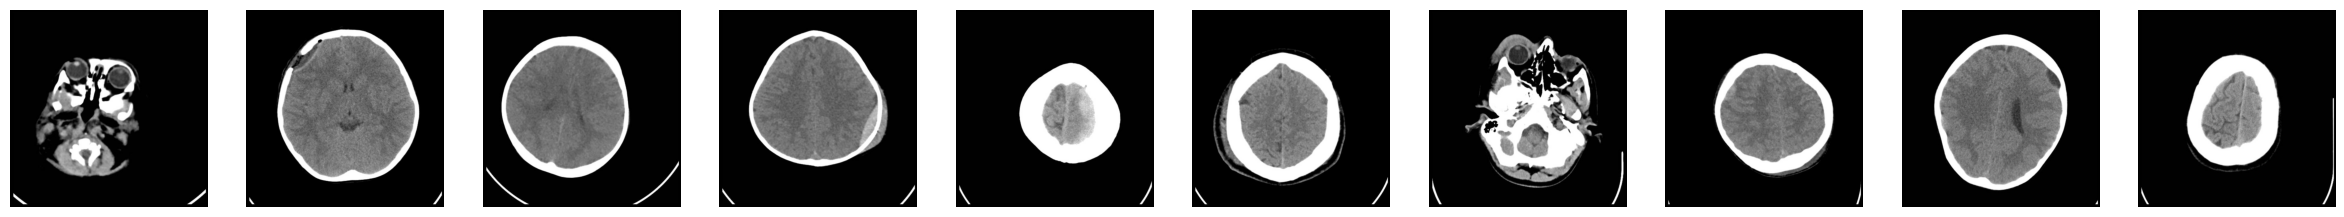

Class Normal


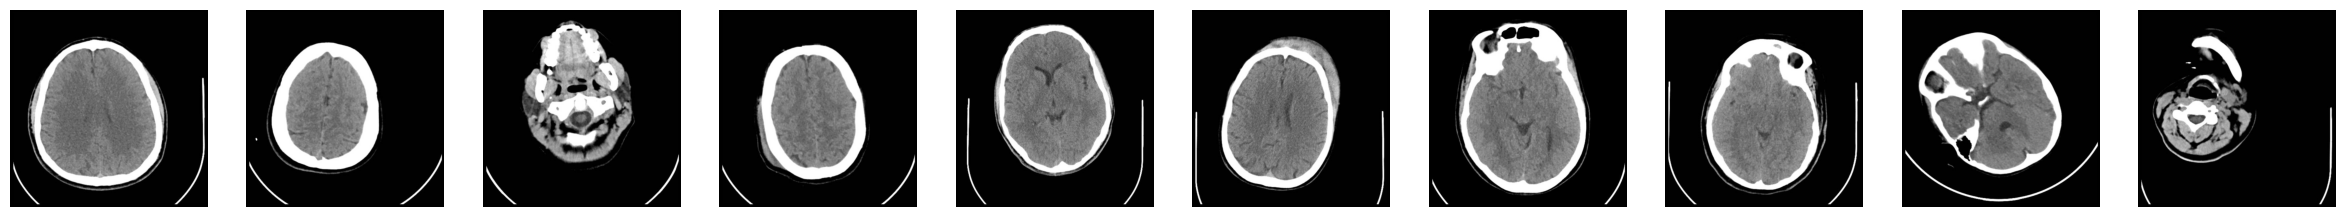

In [ ]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Brain-Stroke-CT-Image-Dataset/dataset')
imshow(images, 10)


In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Brain-Stroke-CT-Image-Dataset/dataset/Stroke/58 (1).jpg"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['Stroke', 'Normal'])
Image Format: JPEG
Image Mode: L
Image Size: (650, 650) pixels (Width: 650, Height: 650)
Image Colors: [(38967, 0), (220081, 1), (7416, 2), (4017, 3), (2683, 4), (1832, 5), (1253, 6), (963, 7), (800, 8), (732, 9), (662, 10), (609, 11), (553, 12), (532, 13), (523, 14), (488, 15), (497, 16), (497, 17), (518, 18), (494, 19), (490, 20), (477, 21), (439, 22), (439, 23), (475, 24), (488, 25), (472, 26), (453, 27), (463, 28), (447, 29), (443, 30), (424, 31), (419, 32), (417, 33), (402, 34), (437, 35), (391, 36), (374, 37), (397, 38), (377, 39), (376, 40), (397, 41), (386, 42), (386, 43), (374, 44), (359, 45), (408, 46), (371, 47), (363, 48), (371, 49), (390, 50), (360, 51), (381, 52), (433, 53), (390, 54), (380, 55), (389, 56), (401, 57), (405, 58), (378, 59), (387, 60), (411, 61), (401, 62), (353, 63), (391, 64), (409, 65), (424, 66), (380, 67), (387, 68), (410, 69), (389, 70), (399, 71), (375, 72), (418, 73), (386, 74), (371, 75), (416, 76), (376

## Noise Metrics

GitHub Copilot: The evaluation metrics indicate that both the Github Copilot's code and ChatGPT's code have successfully reduced the noise in the image, as evidenced by the non-infinite PSNR and non-zero RMSE values.

The PSNR (Peak Signal-to-Noise Ratio) is a measure of the peak error. The fact that PSNR is infinite for the original image indicates there's no noise (as it's being compared with itself), while for the processed images, the PSNR values are finite and quite high, indicating a low level of distortion.

The RMSE (Root Mean Square Error) is a quadratic scoring rule that measures the average magnitude of the error. The fact that RMSE is zero for the original image indicates there's no error (as it's being compared with itself), while for the processed images, the RMSE values are non-zero but quite low, indicating a low level of error.

The SNR (Signal-to-Noise Ratio) is a measure of signal strength relative to background noise. The negative SNR values indicate that the noise is stronger than the signal, which is not ideal. However, the SNR values have increased (become less negative) from the original to the processed images, indicating that the signal has become stronger relative to the noise.

In terms of comparison between Github Copilot's code and ChatGPT's code, the metrics are quite similar, but ChatGPT's code has slightly better PSNR and RMSE values, indicating slightly less distortion and error. However, the differences are quite small and may not be noticeable in the image quality.

GitHub Copilot: Dĩ nhiên, dưới đây là các định nghĩa bằng tiếng Việt:

1. PSNR (Peak Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): PSNR là một độ đo chất lượng của hình ảnh đã được khôi phục so với hình ảnh gốc. PSNR càng cao, chất lượng hình ảnh khôi phục càng tốt và càng giống với hình ảnh gốc.

2. RMSE (Root Mean Square Error - Sai số bình phương trung bình): RMSE là một độ đo sự khác biệt giữa các giá trị dự đoán bởi một mô hình và các giá trị thực tế. RMSE càng thấp, mô hình dự đoán càng chính xác.

3. SNR (Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): SNR là một độ đo chất lượng tín hiệu so với nhiễu. SNR càng cao, chất lượng tín hiệu càng tốt và nhiễu càng ít.

Lưu ý rằng, mặc dù PSNR, RMSE, và SNR cao thường cho thấy chất lượng hình ảnh tốt hơn, nhưng chúng không phải lúc nào cũng dẫn đến độ chính xác cao hơn trong các tác vụ phân loại.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Github Copilot
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    # # ChatGPT
    # mse = np.mean((original - processed)**2)
    # rmse = np.sqrt(mse)
    # psnr = 20 * np.log10(255 / rmse)  # Assuming pixel values range from 0 to 255
    # # snr = 10 * np.log10(np.sum(original**2) / mse)
    # snr = np.mean(original) / np.std(original - processed)

    return psnr, rmse, snr

It looks like you've provided information about three different image quality metrics: PSNR (Peak Signal-to-Noise Ratio), MSE (Mean Squared Error), and AMBE (Absolute Mean Brightness Error). These metrics are commonly used for assessing the quality of reconstructed or processed images. Let me explain each of them briefly:

### 1. Peak Signal-to-Noise Ratio (PSNR):

PSNR is a measure of the quality of a reconstructed or processed image. It is expressed in decibels (dB) and is calculated using the formula:

$$ PSNR = 10 \cdot \log_{10}\left(\frac{{\text{Max Value}^2}}{{\text{MSE}}}\right) $$

Where:
- $\text{Max Value}$ is the maximum pixel value of the image (usually 255 for 8-bit images).
- $\text{MSE}$ is the Mean Squared Error between the original and processed images.

### 2. Mean Squared Error (MSE):

MSE is a measure of the average squared differences between corresponding pixels of the original and processed images. It is calculated using the formula:

$$ MSE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} (I(i, j) - P(i, j))^2 $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

### 3. Absolute Mean Brightness Error (AMBE):

AMBE measures the contrast between the initial image's brightness and the improved image's brightness. It is given by the formula:

$$ AMBE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} |I(i, j) - P(i, j)| $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

These metrics are commonly used for image quality assessment, and you can implement them using the appropriate formulas in your chosen programming language (such as Python). If you have specific questions or need code examples, feel free to ask!

In [ ]:
import cv2
import numpy as np

def calculate_metrics(original_image, processed_image):
    # # Load images
    # original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    # processed_image = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)

    # # Ensure both images have the same dimensions
    # if original_image.shape != processed_image.shape:
    #     raise ValueError("Original and processed images must have the same dimensions.")

    # Maximum pixel value (usually 255 for 8-bit images)
    max_pixel_value = 255

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((original_image - processed_image) ** 2)
    rmse = np.sqrt(mse)
    # # Dimensions of the images
    # N, M = original_image.shape
    # # Calculate Mean Squared Error (MSE)
    # mse = np.sum((original_image - processed_image)**2) / (N * M)

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    psnr = 10 * np.log10(max_pixel_value**2 / mse)

    # Calculate Absolute Mean Brightness Error (AMBE)
    ambe = np.mean(np.abs(original_image - processed_image))

    return psnr, mse, rmse, ambe


## Original

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    return img

# Usage:
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/sample'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset/Original'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

## CLAHE

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

# Define that paths
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/CLAHE'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of child class folders
child_folders = os.listdir(dataset_path)

# Process each child class folder
for folder in child_folders:
    # Create the output folder for the current child class
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the current child class folder
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # # List of lossless formats
    # lossless_formats = ['.png']

    # Process each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)

        # # Preprocess the image
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # CLAHE (Contrast Limited Adaptive Histogram Equalization)
        # create a CLAHE object (Arguments are optional).
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(gray)

        # # Reverse the image (if GRAY2BGR)
        # reversed_img = 255 - cl1
        # # Convert the reversed image back to color
        # color_img = cv2.cvtColor(reversed_img, cv2.COLOR_GRAY2BGR)

        # Export the preprocessed image to the output folder
        filename, extension = os.path.splitext(image_file)
        # output_image_path = os.path.join(output_folder, image_file)
        output_image_path = os.path.join(output_folder, filename + '.jpg') # ('jpg', 'png')

        # cv2.imwrite(output_image_path, img)
        cv2.imwrite(output_image_path, cl1)
        # cv2.imwrite(output_image_path, color_img)
        # cv2.imwrite(output_image_path, final_img)


## CLAHE + median filter

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    # Apply median filter
    median = cv2.medianBlur(cl1, 3)

    return median

# Usage:
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset/CLAHE_medianF3x3_sample'
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset/CLAHE_medianF3x3'
preprocess_and_copy(dataset_path, output_path, preprocess_func)